In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("Customer Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. replacing the blanks with 0 as tenure is 0 and no total charges are recorded
2. converting the type tyo float

In [ ]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0").astype(float)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["customerID"].duplicated().sum()

0

Converting the data type in senior citizen column , it was previously as 0 & 1, Changing it to Yes and No.

In [ ]:
def convert(value):
  if value ==1:
    return "Yes"
  else:
    return "No"
df['SeniorCitizen']= df['SeniorCitizen'].apply(convert)

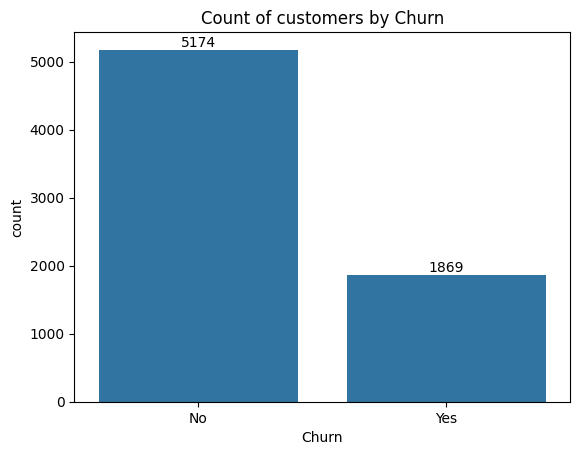

In [ ]:
ax= sns.countplot(x=df["Churn"])
plt.title("Count of customers by Churn")
ax.bar_label(ax.containers[0])
plt.show()

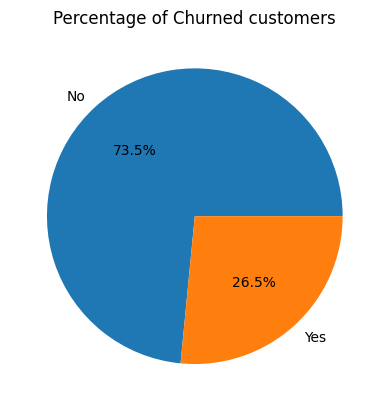

In [ ]:
plt.pie(df["Churn"].value_counts(),labels=df["Churn"].value_counts().index,autopct="%1.1f%%")
plt.title("Percentage of Churned customers")
plt.show()

*Deep dive into why thr churn happened?*

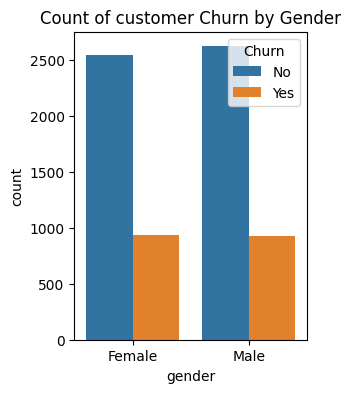

In [ ]:
plt.figure(figsize=(3,4))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Count of customer Churn by Gender")
plt.show()

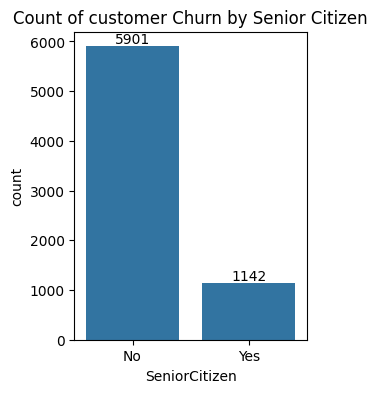

In [ ]:
plt.figure(figsize=(3,4))
ax= sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer Churn by Senior Citizen")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Conclusion:** Comparetively a greater percentage of people in Senior Citizen have churned

<ipython-input-59-97a83a7c2551>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentages.iloc[i].cumsum()[j] - percentages.iloc[i][j] / 2,
<ipython-input-59-97a83a7c2551>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{percentages.iloc[i][j]:.1f}%',


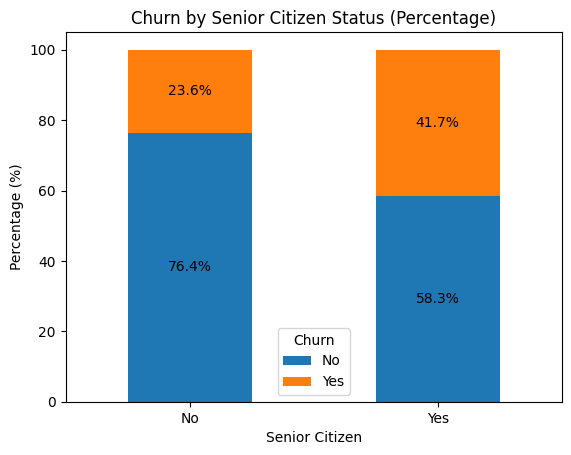

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Calculate the counts of 'Churn' for each 'SeniorCitizen' group
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
percentages.plot(kind='bar', stacked=True)

# Add title and labels
plt.title("Churn by Senior Citizen Status (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
for i in range(len(percentages)):
    for j in range(len(percentages.columns)):
        plt.text(i, percentages.iloc[i].cumsum()[j] - percentages.iloc[i][j] / 2,
                 f'{percentages.iloc[i][j]:.1f}%',
                 ha='center', va='center')

plt.show()

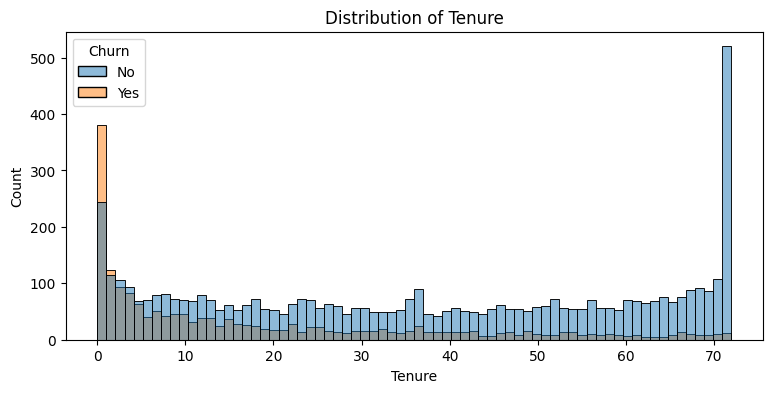

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure", data= df, bins= 70, hue= "Churn")
plt.xlabel("Tenure")
plt.title("Distribution of Tenure")
plt.show()

**Conclusion:** people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned.

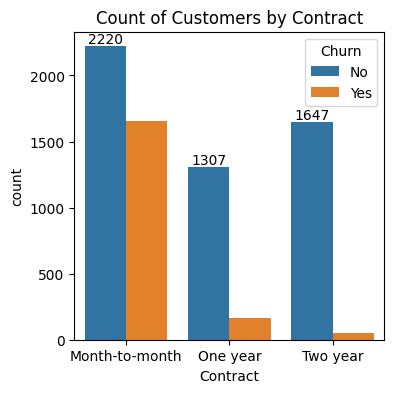

In [ ]:
plt.figure(figsize=(4,4))
bx= sns.countplot(x= "Contract", data= df, hue= "Churn")
bx.bar_label(bx.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Conclusion:** People who have month to month contract are likely to churn morer than people have 1 or 2  years of contract

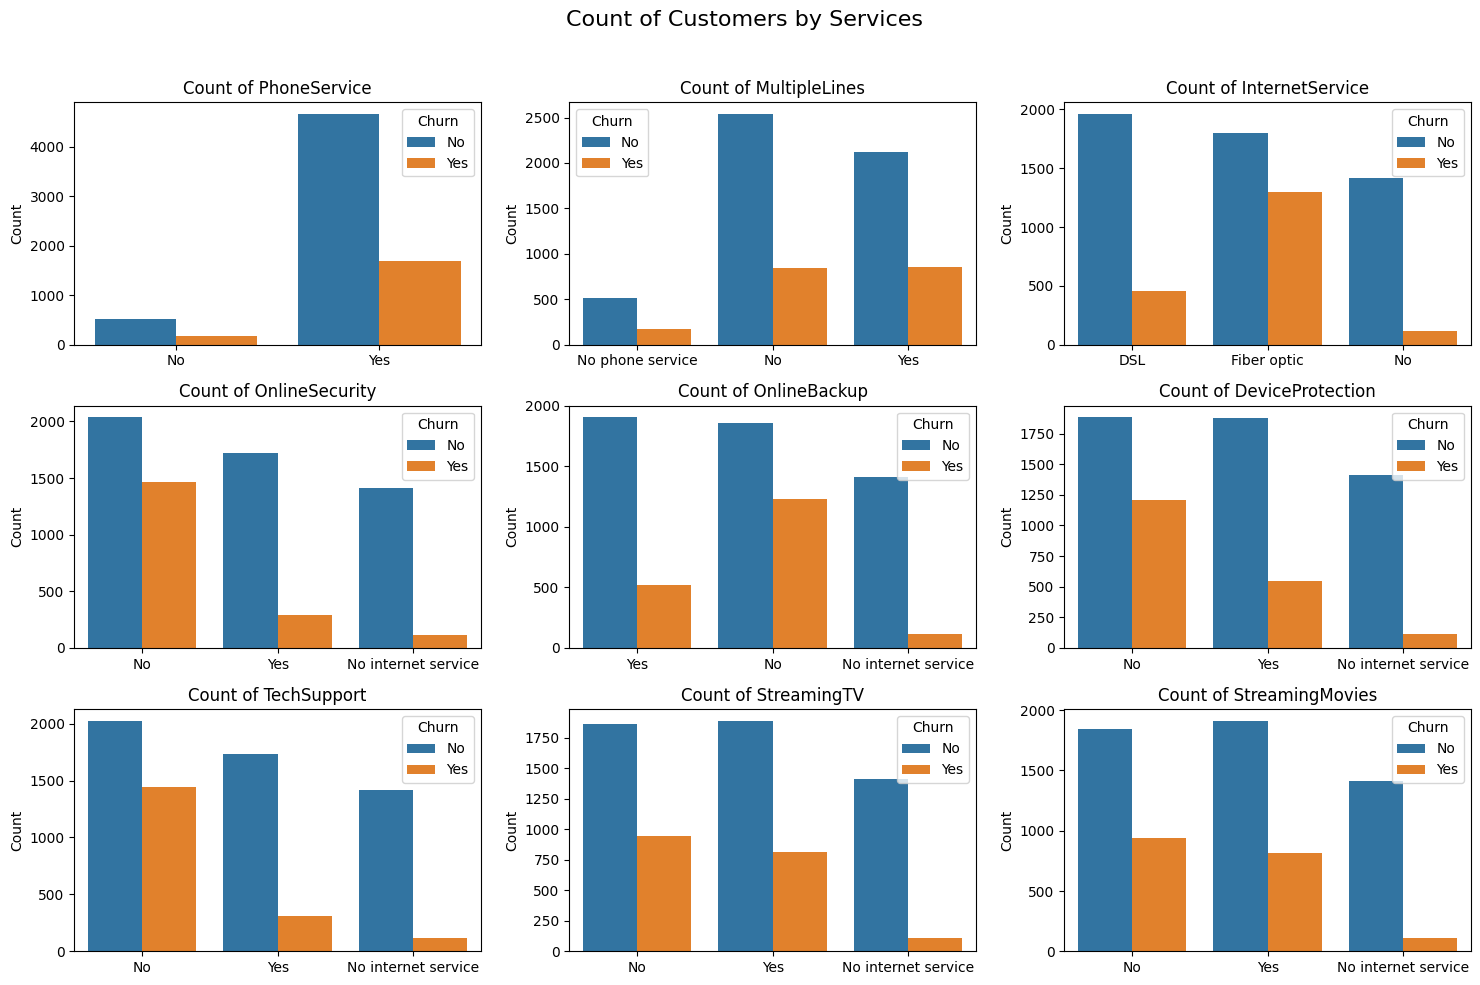

In [ ]:
# List of columns for which you want to create count plots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define the grid size based on the number of columns
n_cols = 3  # Number of columns for the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows based on total plots

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.suptitle("Count of Customers by Services", fontsize=16)

# Flatten axes to make it easier to iterate
axes = axes.flatten()

# Plot each count plot in the grid
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


Customers with services like Fiber optic internet, OnlineSecurity, and TechSupport tend to have higher churn rates. In general, customers without specific services (e.g., "No internet service" or "No phone service") have lower churn rates. Streaming services like StreamingTV and StreamingMovies show similar churn patterns, with churn being more common among those who subscribe to these services.

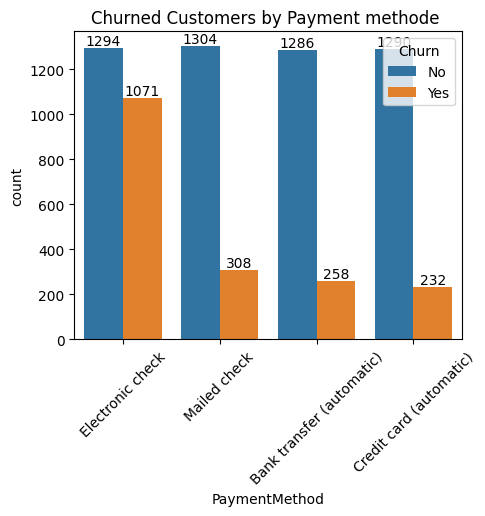

In [6]:
plt.figure(figsize=(5,4))
ax= sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churned Customers by Payment methode ")
plt.show()

Customer is likely to churn when he is using electronc check as a payment methode.